In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
matplotlib.rcParams['figure.figsize'] = (10,8)#图片像素 
matplotlib.rcParams['savefig.dpi'] = 300# 分辨率
font = {'family': 'MicroSoft YaHei'}
matplotlib.rc('font', **font)  # 使支持中文

In [3]:
MD = pd.read_excel("Molecular_Descriptor.xlsx", sheet_name=0)
Act = pd.read_excel("ERα_activity.xlsx", sheet_name=0)

In [37]:
def get_sigma(data):
    sum_2 = sum(data)**2
    sum_ = sum(data**2)
    return ((sum_ - sum_2)/len(data)/(len(data)-1))**0.5

sigma = []
for i in range(729):
    sigma.append(get_sigma(MD.iloc[1:-1,i+1]))

In [4]:
X = MD.iloc[:, 1:].values
Y = Act.iloc[:, 2].values
feat_labels = MD.columns[1:]
X.shape #看一下数据量

(1974, 729)

In [5]:
##构建描述符名字和id之间的映射
feat_labels_dist = {}
feat_labels_id_dist = {}
for i in range(len(feat_labels)):
    feat_labels_dist[feat_labels[i]] = i #名字 to id
    feat_labels_id_dist[i] = feat_labels[i] #id to 名字
feat_labels_id_dist

{0: 'nAcid',
 1: 'ALogP',
 2: 'ALogp2',
 3: 'AMR',
 4: 'apol',
 5: 'naAromAtom',
 6: 'nAromBond',
 7: 'nAtom',
 8: 'nHeavyAtom',
 9: 'nH',
 10: 'nB',
 11: 'nC',
 12: 'nN',
 13: 'nO',
 14: 'nS',
 15: 'nP',
 16: 'nF',
 17: 'nCl',
 18: 'nBr',
 19: 'nI',
 20: 'nX',
 21: 'ATSc1',
 22: 'ATSc2',
 23: 'ATSc3',
 24: 'ATSc4',
 25: 'ATSc5',
 26: 'ATSm1',
 27: 'ATSm2',
 28: 'ATSm3',
 29: 'ATSm4',
 30: 'ATSm5',
 31: 'ATSp1',
 32: 'ATSp2',
 33: 'ATSp3',
 34: 'ATSp4',
 35: 'ATSp5',
 36: 'nBase',
 37: 'BCUTw-1l',
 38: 'BCUTw-1h',
 39: 'BCUTc-1l',
 40: 'BCUTc-1h',
 41: 'BCUTp-1l',
 42: 'BCUTp-1h',
 43: 'nBonds',
 44: 'nBonds2',
 45: 'nBondsS',
 46: 'nBondsS2',
 47: 'nBondsS3',
 48: 'nBondsD',
 49: 'nBondsD2',
 50: 'nBondsT',
 51: 'nBondsQ',
 52: 'nBondsM',
 53: 'bpol',
 54: 'C1SP1',
 55: 'C2SP1',
 56: 'C1SP2',
 57: 'C2SP2',
 58: 'C3SP2',
 59: 'C1SP3',
 60: 'C2SP3',
 61: 'C3SP3',
 62: 'C4SP3',
 63: 'SCH-3',
 64: 'SCH-4',
 65: 'SCH-5',
 66: 'SCH-6',
 67: 'SCH-7',
 68: 'VCH-3',
 69: 'VCH-4',
 70: 'VCH-5',

In [6]:
##得到精简后的数据集
main_feature_id = [id + 1 for id in main_feature_id]
MD_ = MD.iloc[:,main_feature_id]
X_ = MD_.values

score_dist = {}
for i in range(len(main_feature_id)):
    score_dist[main_feature_id[i]] = main_feature_scores[i]
score_dist #id to 分数

NameError: name 'main_feature_id' is not defined

In [7]:
#置换特征重要性（Permutation importance）
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
# X_tmp = preprocessing.scale(X_)
X_tmp = preprocessing.scale(X_m)

rf = RandomForestRegressor()
rf.fit(X_tmp, Y)
result = permutation_importance(rf, X_tmp, Y, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
idx_refind = [main_feature_id[i] for i in sorted_idx]
label_tmp = [feat_labels_id_dist[label] for label in idx_refind]

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels = label_tmp)
ax.set_title("置换特征重要性")
fig.tight_layout()
plt.show()

NameError: name 'X_m' is not defined

In [12]:
idx_refind_ = idx_refind[-20:]
idx_refind_ = idx_refind_[::-1]
label_main_2 = [feat_labels_id_dist[label] for label in idx_refind_]
idx_refind__ = [id +1 for id in idx_refind_]
MD__ = MD.iloc[:,idx_refind__]
X__ = MD__.values

,MDEC-24,MAXDN,minHdNH,C2SP2,VC-6,BCUTc-1h,maxHdNH,nAtomLC,minddsN,nHBAcc2,MLFER_BH,naasC,maxaaO,SHsOH,DELS,ATSc4,Zagreb,CrippenMR,VABC,VCH-6
0,0.0,1.979451,0.0,11,0.000000,0.185437,0.0,3,0,4,1.801,5,0.0,0.469126,21.658930,0.161524,166,122.6000,414.727478,0.255891
1,0.0,2.026776,0.0,11,0.000000,0.185459,0.0,3,0,4,1.801,5,0.0,0.449126,22.190398,0.161524,174,131.8340,449.319447,0.172558
2,0.0,2.256502,0.0,16,0.000000,0.116954,0.0,3,0,5,2.141,7,0.0,0.997247,28.130907,0.175159,176,133.3328,422.004313,0.200335
3,0.0,1.999022,0.0,11,0.000000,0.185459,0.0,3,0,4,1.801,5,0.0,0.456486,21.927179,0.161226,174,131.8340,449.319447,0.274620
4,0.0,2.097837,0.0,16,0.000000,0.185459,0.0,3,0,4,1.845,6,0.0,0.473631,22.693857,0.152869,174,130.7880,430.510071,0.204633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0.0,6.349472,0.0,22,0.009815,0.278515,0.0,4,0,8,2.208,9,0.0,1.014091,60.360422,-0.235399,236,156.5456,530.801600,0.308684
1970,0.0,6.367517,0.0,22,0.009815,0.278503,0.0,4,0,8,2.386,9,0.0,2.095765,67.055281,-0.246041,228,146.7712,496.209630,0.308684
1971,0.0,6.317102,0.0,22,0.009815,0.278503,0.0,4,0,8,2.386,9,0.0,2.118206,66.279634,-0.246079,228,146.7712,496.209630,0.308684
1972,0.0,6.103216,0.0,16,0.009815,0.278460,0.0,4,0,6,1.763,5,0.0,1.065131,49.246000,-0.201453,174,109.9256,374.063593,0.288925


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.8s finished

[2021-10-15 17:56:24] Features: 1/20 -- score: 0.18561005173230244[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   11.1s finished

[2021-10-15 17:56:35] Features: 2/20 -- score: 0.18088372914515655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   13.4s finished

[2021-10-15 17:56:49] Features: 3/20 -- score: 0.1986132998741853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

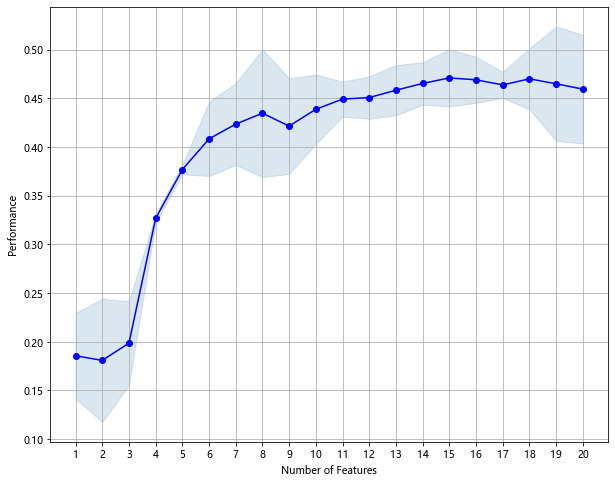

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.7s finished

[2021-10-15 18:04:54] Features: 1/20 -- score: -1.5441063936609305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   11.1s finished

[2021-10-15 18:05:05] Features: 2/20 -- score: -1.576856710021846[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   13.2s finished

[2021-10-15 18:05:18] Features: 3/20 -- score: -1.5035898398885008[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

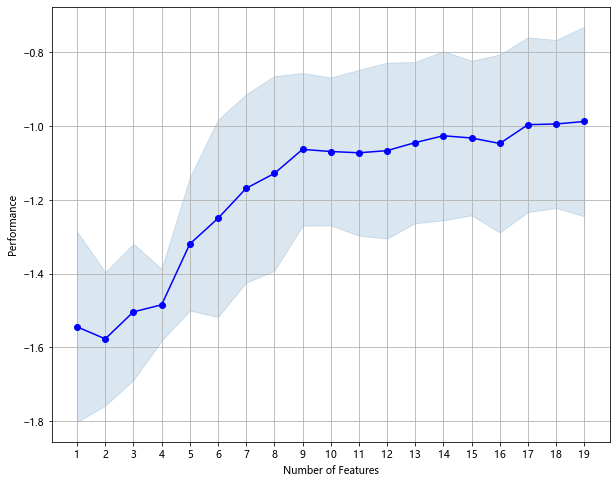

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.8s finished

[2021-10-15 18:19:04] Features: 1/20 -- score: -1.023634130570559[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


In [277]:
RF_tmp = RandomForestRegressor(n_estimators = 100,)
RF_tmp.fit(X__,Y)

#特征序列选择 （Sequential Feature Selection）
##R2
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs = sfs(RF_tmp,
           k_features=20, 
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=2)
sfs = sfs.fit(X_, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()

In [ ]:
sfs = sfs(RF_tmp,
           k_features=20, 
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=2)
sfs = sfs.fit(X_, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()
#特征序列选择 （Sequential Feature Selection）
##MAE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
#特征序列选择 （Sequential Feature Selection）
##MSE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



sfs = sfs(RF_tmp,
           k_features=20, 
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_absolute_error',
           cv=2)
sfs = sfs.fit(X_, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

R2 = []
MSE = []
MAE = []

# params = {
# 'n_estimators': 400, 
# 'max_depth': 11,
# 'learning_rate': 0.06,
#  'loss': 'ls',
#  'subsample':0.8
#  }

num = 20
x = preprocessing.scale(X__)
while num!=0:
    x=x[:, 0:num]
    #rfr=GradientBoostingRegressor(**params) #效果好
    # rfr=MLPRegressor()
    # rfr = KNeighborsRegressor(n_neighbors=5)
    rfr = SVR(kernel='rbf')
    rfr.fit(x, Y)
    rfr_y_predict = rfr.predict(x)

    R2.append(r2_score(Y, rfr_y_predict))
    MSE.append(mean_squared_error(Y, rfr_y_predict))
    MAE.append(mean_absolute_error(Y, rfr_y_predict))

    print (num, "\t",r2_score(Y, rfr_y_predict),"\t",mean_squared_error(Y, rfr_y_predict),"\t",mean_absolute_error(Y, rfr_y_predict))
    '''
    print "特征数量",num,":"
    print "支持向量回归的默认评估值为：", rfr.score(x, y)
    print "支持向量回归的R_squared值为：", r2_score(y, rfr_y_predict)
    print "支持向量回归的均方误差为:", mean_squared_error(y, rfr_y_predict)
    print "支持向量回归的平均绝对误差为:", mean_absolute_error(y, rfr_y_predict)
    print('**********************************')
    '''
    num-=1


20 	 0.7106525656468173 	 0.5856303500016228 	 0.5582366454180248


KeyboardInterrupt: 

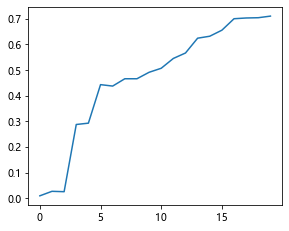

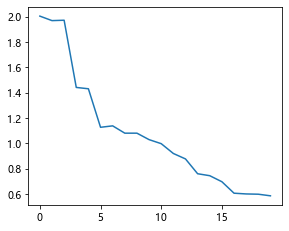

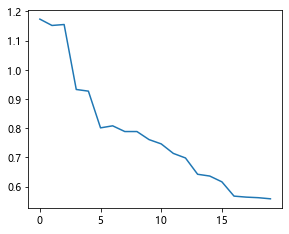

In [14]:
x = range(len(R2))

plt.subplot(2,2,1)
plt.plot(x, R2[::-1])
plt.show()
plt.subplot(2,2,2)
plt.plot(x, MSE[::-1])
plt.show()
plt.subplot(2,2,3)
plt.plot(x, MAE[::-1])
plt.show()

In [15]:
sorted_scores_ = [score_dist[i] for i in idx_refind_]
score_dist_ = {}
for i in range(len(sorted_scores_)):
    score_dist_[sorted_scores_[i]] = idx_refind_[i]
sorted_scores_.sort()

idx_main_2_ = [score_dist_[i] for i in sorted_scores_]
label_main_2_ = MD.columns[[i+1 for i in idx_main_2_]]
label_main_2_

Index(['DELS', 'nAtomLC', 'VCH-6', 'CrippenMR', 'Zagreb', 'naasC', 'SHsOH',
       'VABC', 'ATSc4', 'VC-6', 'nHBAcc2', 'MLFER_BH', 'BCUTc-1h', 'minHdNH',
       'maxaaO', 'maxHdNH', 'minddsN', 'C2SP2', 'MAXDN', 'MDEC-24'],
      dtype='object')

Text(0.5, 0, '重要性系数')

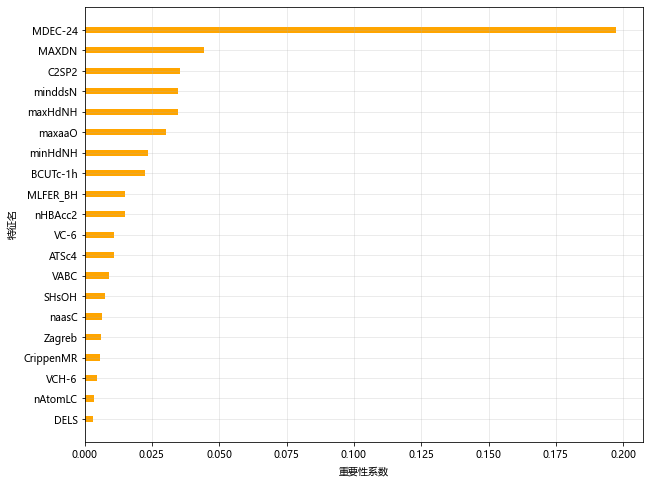

In [17]:
yy = sorted_scores_
xx = range(len(yy))
plt.barh(range(len(xx)), yy, height=0.3, color='orange')
plt.yticks(range(len(idx_main_2_)),label_main_2_)
plt.grid(alpha=0.3)  # 添加网格
plt.ylabel('特征名')
plt.xlabel('重要性系数')
# plt.title('特征选择')


In [42]:
MD__.to_csv("MD_filtered.csv")

,MDEC-24,MAXDN,minHdNH,C2SP2,VC-6,BCUTc-1h,maxHdNH,nAtomLC,minddsN,nHBAcc2,...,DELS,ATSc4,Zagreb,CrippenMR,VABC,VCH-6,TopoPSA,MLogP,XLogP,WPATH
0,0.0,1.979451,0.0,11,0.000000,0.185437,0.0,3,0,4,...,21.658930,0.161524,166,122.6000,414.727478,0.255891,67.23,3.77,4.666,3011
1,0.0,2.026776,0.0,11,0.000000,0.185459,0.0,3,0,4,...,22.190398,0.161524,174,131.8340,449.319447,0.172558,67.23,3.99,5.804,3516
2,0.0,2.256502,0.0,16,0.000000,0.116954,0.0,3,0,5,...,28.130907,0.175159,176,133.3328,422.004313,0.200335,87.46,3.77,2.964,3542
3,0.0,1.999022,0.0,11,0.000000,0.185459,0.0,3,0,4,...,21.927179,0.161226,174,131.8340,449.319447,0.274620,67.23,3.99,6.015,3594
4,0.0,2.097837,0.0,16,0.000000,0.185459,0.0,3,0,4,...,22.693857,0.152869,174,130.7880,430.510071,0.204633,67.23,3.99,4.462,3594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0.0,6.349472,0.0,22,0.009815,0.278515,0.0,4,0,8,...,60.360422,-0.235399,236,156.5456,530.801600,0.308684,119.90,4.21,2.526,7121
1970,0.0,6.367517,0.0,22,0.009815,0.278503,0.0,4,0,8,...,67.055281,-0.246041,228,146.7712,496.209630,0.308684,141.90,3.99,1.884,6171
1971,0.0,6.317102,0.0,22,0.009815,0.278503,0.0,4,0,8,...,66.279634,-0.246079,228,146.7712,496.209630,0.308684,141.90,3.99,1.884,6421
1972,0.0,6.103216,0.0,16,0.009815,0.278460,0.0,4,0,6,...,49.246000,-0.201453,174,109.9256,374.063593,0.288925,101.44,3.33,0.782,2583


In [237]:
LL = []
with open("test4.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        line_list = line.split(' ')
        LL.append(line_list)

[['1', '\t', '35', '\t', 'ATSp4', '\t', '2.214'],
 ['2', '\t', '36', '\t', 'ATSp5', '\t', '2.195'],
 ['3', '\t', '34', '\t', 'ATSp3', '\t', '2.180'],
 ['4', '\t', '726', '\t', 'WPATH', '\t', '2.039'],
 ['5', '\t', '33', '\t', 'ATSp2', '\t', '2.020'],
 ['6', '\t', '32', '\t', 'ATSp1', '\t', '1.965'],
 ['7', '\t', '106', '\t', 'ECCEN', '\t', '1.571'],
 ['8', '\t', '639', '\t', 'fragC', '\t', '1.165'],
 ['9', '\t', '718', '\t', 'VABC', '\t', '0.943'],
 ['10', '\t', '720', '\t', 'MW', '\t', '0.928'],
 ['11', '\t', '717', '\t', 'TopoPSA', '\t', '0.730'],
 ['12', '\t', '4', '\t', 'AMR', '\t', '0.557'],
 ['13', '\t', '105', '\t', 'CrippenMR', '\t', '0.516'],
 ['14', '\t', '729', '\t', 'Zagreb', '\t', '0.452'],
 ['15', '\t', '660', '\t', 'MDEC-23', '\t', '0.448'],
 ['16', '\t', '5', '\t', 'apol', '\t', '0.444'],
 ['17', '\t', '45', '\t', 'nBonds2', '\t', '0.442'],
 ['18', '\t', '46', '\t', 'nBondsS', '\t', '0.436'],
 ['19', '\t', '8', '\t', 'nAtom', '\t', '0.435'],
 ['20', '\t', '54', '\t', 'b

In [238]:
name = []
for i in range(len(LL)):
    name.append(LL[i][4])

MD_mRMR = MD.loc[:,name]
MD_mRMR.to_csv("MD_mRMR_.csv")
X_mRMR = MD_mRMR.values
X_mRMR.shape

(1974, 350)

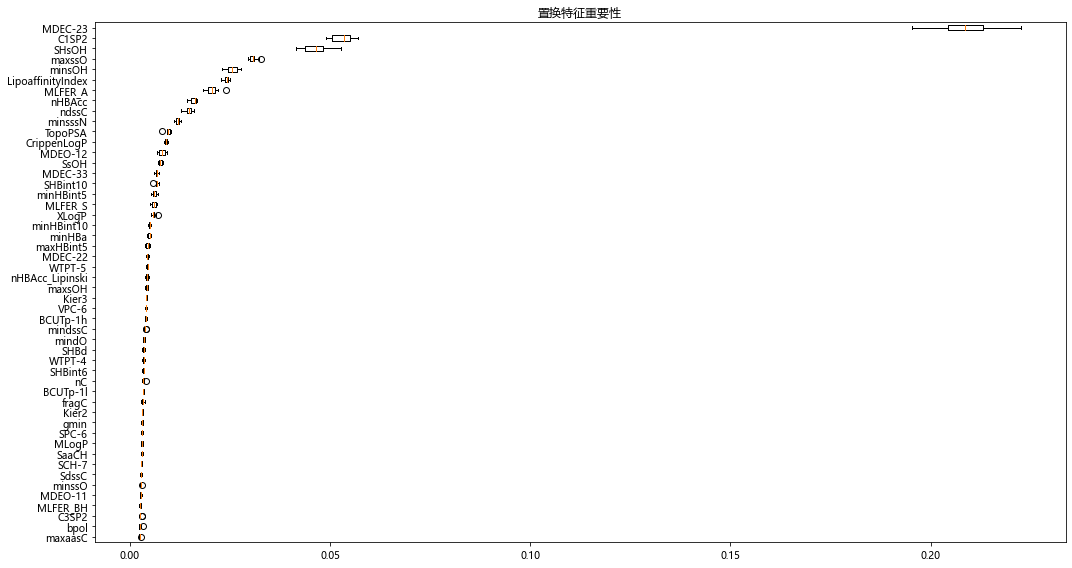

In [239]:
#置换特征重要性（Permutation importance）
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
# X_tmp = preprocessing.scale(X_)
X_tmp = preprocessing.scale(X_mRMR)

# rf = RandomForestRegressor(n_estimators = 3000)
rf = RandomForestRegressor(n_estimators = 3000)
rf.fit(X_tmp, Y)
result = permutation_importance(rf, X_tmp, Y, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

name_refind = [name[i] for i in sorted_idx]

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx[-50:]].T,
           vert=False, labels = name_refind[-50:])
ax.set_title("置换特征重要性")
fig.tight_layout()
plt.show()

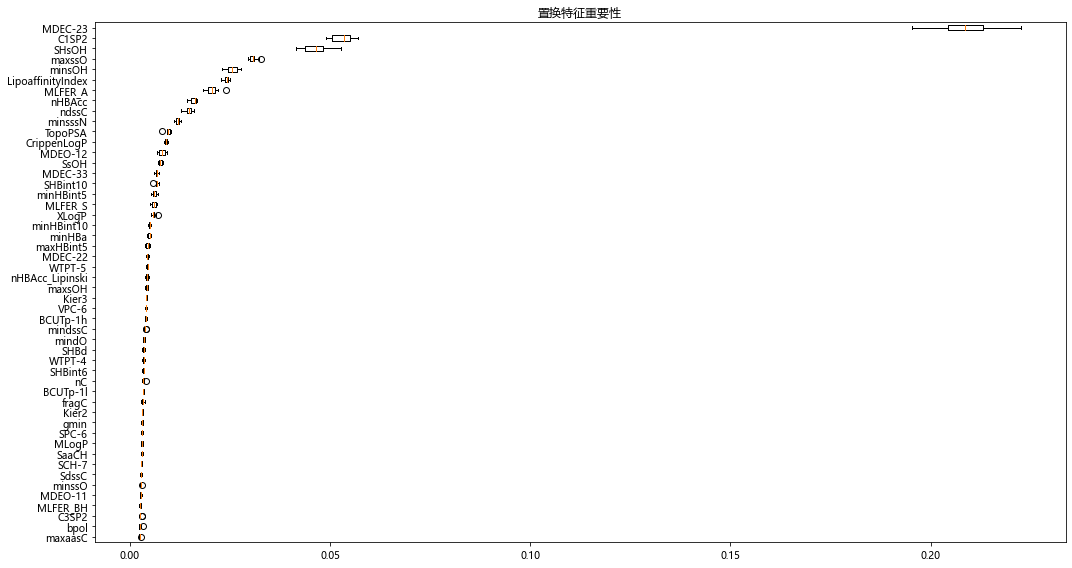

In [240]:
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx[-50:]].T,
           vert=False, labels = name_refind[-50:])
ax.set_title("置换特征重要性")
fig.tight_layout()
plt.show()

In [241]:
idx_refind_ = sorted_idx[-20:]
idx_refind_ = idx_refind_[::-1]
name_refind_ = [name[i] for i in idx_refind_]
MD_mRMR = MD.loc[:,name_refind_]
X_mRMR = MD_mRMR.values
name_refind_

MD__ = MD.loc[:,name_refind_]
X__ = MD__.values
MD__

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,67.23,5.50408,0.269680,9.968948,9.238227,0.000000,3.092949,2.288,4.666,0.000000
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,67.23,6.28428,0.269680,10.058948,9.238227,0.000000,2.997752,2.288,5.804,0.000000
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,87.46,6.11878,0.495846,19.730394,10.328977,9.842059,3.125957,2.901,2.964,4.688339
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,67.23,6.28428,0.269680,10.025028,8.529910,0.000000,3.022916,2.288,6.015,0.000000
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,67.23,5.55658,0.269680,9.993342,8.529910,0.000000,3.103616,2.603,4.462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,119.90,6.07537,1.933548,19.671114,17.109186,17.160557,0.000000,3.627,2.526,2.986389
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,141.90,5.46937,1.906625,39.000194,17.109186,17.177035,0.000000,3.901,1.884,2.974232
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,141.90,5.46937,1.850440,38.871608,16.351392,23.334095,0.000000,3.901,1.884,2.956091
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,101.44,4.17938,1.666336,19.375230,13.747820,17.182692,0.000000,2.841,0.782,2.970346


In [242]:
name_refind_

['MDEC-23',
 'C1SP2',
 'SHsOH',
 'maxssO',
 'minsOH',
 'LipoaffinityIndex',
 'MLFER_A',
 'nHBAcc',
 'ndssC',
 'minsssN',
 'TopoPSA',
 'CrippenLogP',
 'MDEO-12',
 'SsOH',
 'MDEC-33',
 'SHBint10',
 'minHBint5',
 'MLFER_S',
 'XLogP',
 'minHBint10']

In [216]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

R2 = []
MSE = []
MAE = []

# params = {
# 'n_estimators': 400, 
# 'max_depth': 11,
# 'learning_rate': 0.06,
#  'loss': 'ls',
#  'subsample':0.8
#  }

num = 20
x = preprocessing.scale(X__)
while num!=0:
    x=x[:, 0:num]
    #rfr=GradientBoostingRegressor(**params) #效果好
    # rfr=MLPRegressor()
    # rfr = KNeighborsRegressor(n_neighbors=5)
    rfr = SVR(kernel='rbf')
    rfr.fit(x, Y)
    rfr_y_predict = rfr.predict(x)

    R2.append(r2_score(Y, rfr_y_predict))
    MSE.append(mean_squared_error(Y, rfr_y_predict))
    MAE.append(mean_absolute_error(Y, rfr_y_predict))

    print (num, "\t",r2_score(Y, rfr_y_predict),"\t",mean_squared_error(Y, rfr_y_predict),"\t",mean_absolute_error(Y, rfr_y_predict))
    '''
    print "特征数量",num,":"
    print "支持向量回归的默认评估值为：", rfr.score(x, y)
    print "支持向量回归的R_squared值为：", r2_score(y, rfr_y_predict)
    print "支持向量回归的均方误差为:", mean_squared_error(y, rfr_y_predict)
    print "支持向量回归的平均绝对误差为:", mean_absolute_error(y, rfr_y_predict)
    print('**********************************')
    '''
    num-=1
x = range(1,len(R2)+1)



20 	 0.7814847064966202 	 0.4422682651434545 	 0.47025441268941015
19 	 0.7770536118303344 	 0.45123666510908117 	 0.47691614292869206
18 	 0.7726759442686398 	 0.46009693025045656 	 0.48269556207711223
17 	 0.7677957003932445 	 0.4699743944665468 	 0.4885933122146428
16 	 0.7633583380868102 	 0.47895547994397714 	 0.4983486745979934
15 	 0.7479760041367485 	 0.5100888529948013 	 0.5178991288576663
14 	 0.7430414433879933 	 0.5200762528998941 	 0.5230609739311697
13 	 0.7324318050460296 	 0.5415498361355094 	 0.5323657514344511
12 	 0.7196935942055616 	 0.5673315849509908 	 0.546524931707546
11 	 0.7109951748368915 	 0.5849369194884219 	 0.555519109485112
10 	 0.6951773655746092 	 0.6169516812409739 	 0.5748756907562048
9 	 0.6932187599456643 	 0.6209158390796572 	 0.5754535935732633
8 	 0.6656198436090778 	 0.676775200922597 	 0.6034347702227534
7 	 0.6358169057201413 	 0.7370954349208375 	 0.6345325445914062
6 	 0.6344169216134277 	 0.739928959898324 	 0.6385680820492267
5 	 0.607329

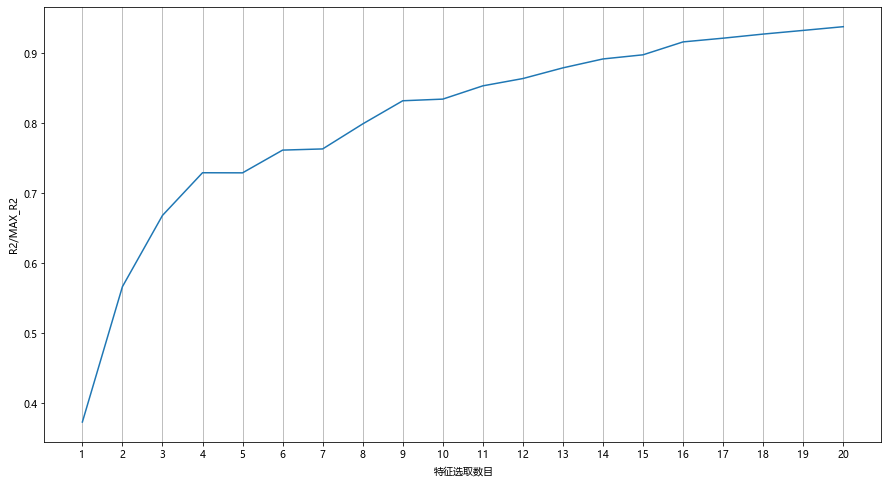

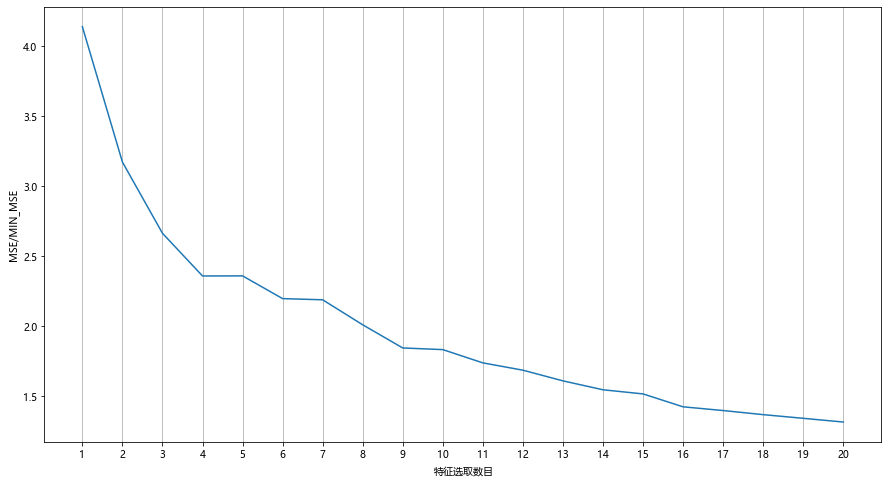

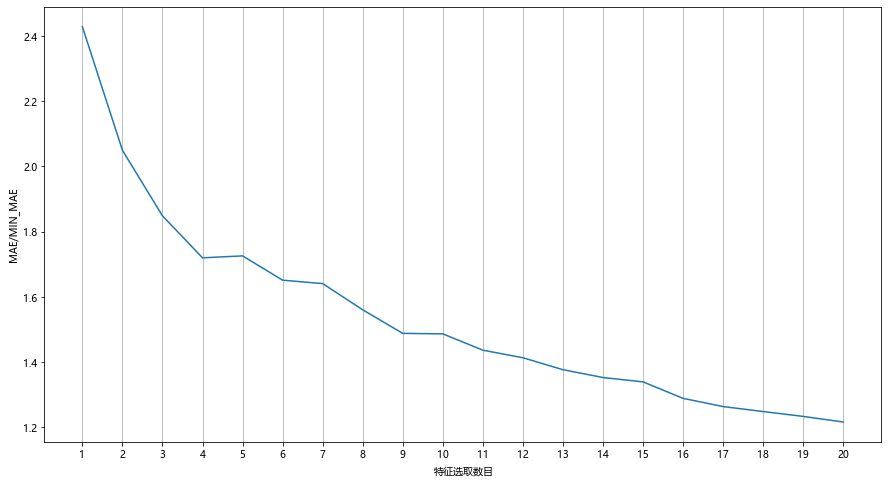

In [217]:
matplotlib.rcParams['figure.figsize'] = (15,8)#图片像素 
matplotlib.rcParams['savefig.dpi'] = 300# 分辨率

R2 = [R/0.8334772365209091 for R in R2]
MSE = [m/0.33703697590233983 for m in MSE]
MAE = [m/0.3867652370294614 for m in MAE]

plt.plot(x, R2[::-1])
plt.xlabel("特征选取数目")
plt.grid(axis='x')
plt.ylabel("R2/MAX_R2")
plt.xticks(range(1,21))
plt.savefig("R2.png")
plt.show()

plt.plot(x, MSE[::-1])
plt.xlabel("特征选取数目")
plt.grid(axis='x')
plt.ylabel("MSE/MIN_MSE")
plt.xticks(range(1,21))
plt.savefig("MSE.png")
plt.show()

plt.plot(x, MAE[::-1])
plt.xlabel("特征选取数目")
plt.grid(axis='x')
plt.ylabel("MAE/MIN_MAE")
plt.xticks(range(1,21))
plt.savefig("MAE.png")
plt.show()

In [218]:
name_refind_

['MDEC-23',
 'C1SP2',
 'SHsOH',
 'maxssO',
 'minsOH',
 'LipoaffinityIndex',
 'MLFER_A',
 'nHBAcc',
 'ndssC',
 'TopoPSA',
 'minsssN',
 'CrippenLogP',
 'MDEO-12',
 'SHBint10',
 'SsOH',
 'MDEC-33',
 'minHBint5',
 'XLogP',
 'MLFER_S',
 'minHBa']

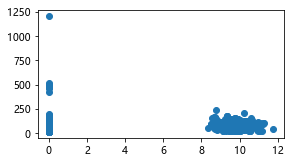

In [236]:
# # plt.subplots(3,3,figsize=(30, 30))
# plt.subplot(3,3,1)
# plt.scatter(X__[:,4], X__[:,9])
# # plt.subplot(3,3,2)
# # plt.scatter(X__[0], X__[9])
# # plt.subplot(3,3,3)
# # plt.scatter(X__[0], X__[9])
# # plt.subplot(3,3,4)
# # plt.scatter(X__[0], X__[9])
# # plt.subplot(3,3,5)
# # plt.scatter(X__[0], X__[9])
# # plt.subplot(3,3,6)
# # plt.scatter(X__[0], X__[9])
# plt.subplot(3,3,7)
# # plt.scatter(X__[0], X__[9])
# # plt.subplot(3,3,8)
# # plt.scatter(X__[0], X__[9])
# # plt.subplot(3,3,9)
# # plt.scatter(X__[0], X__[9])

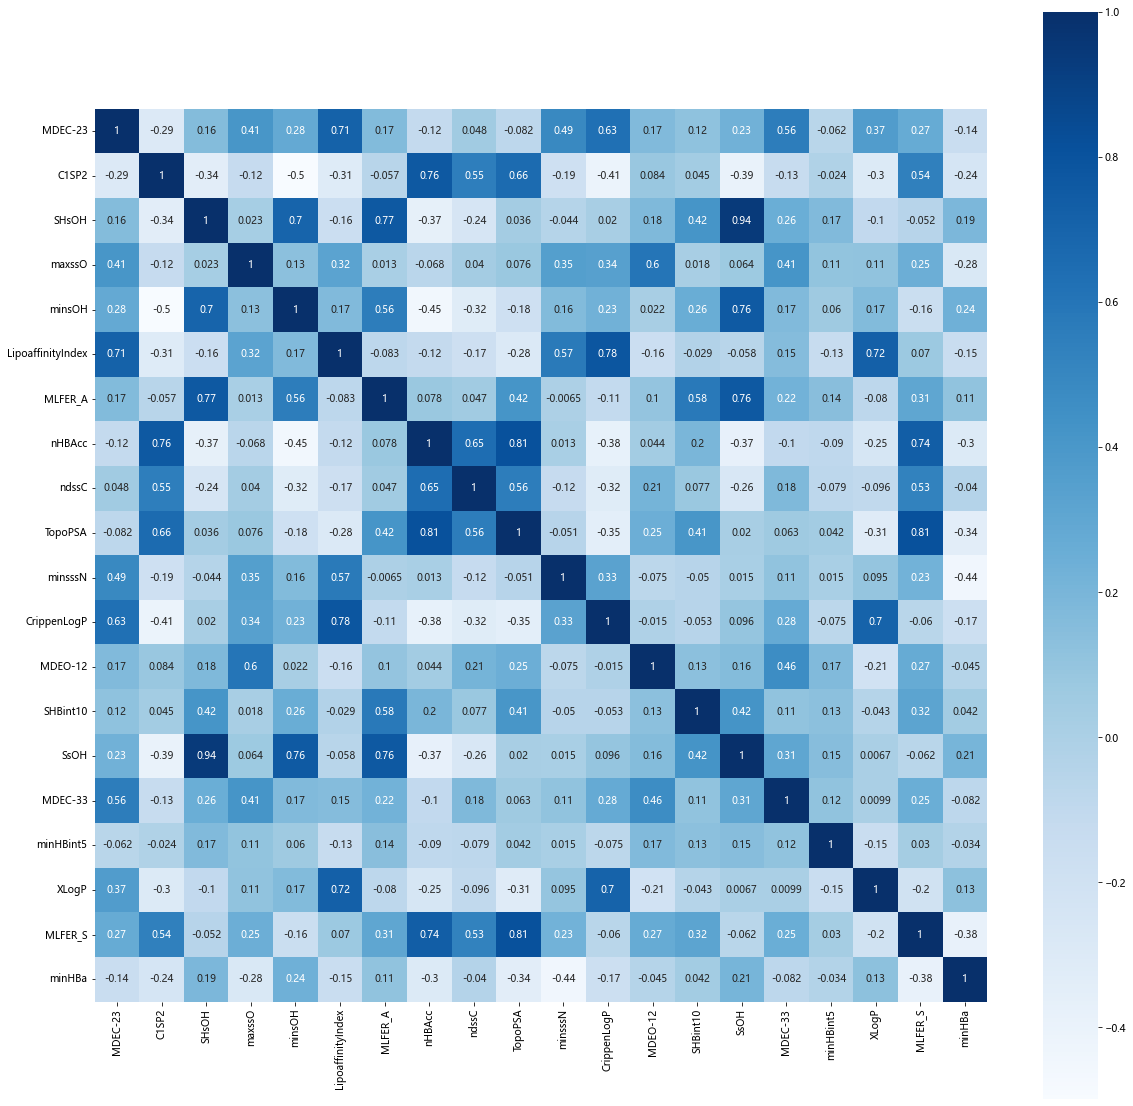

In [226]:
#画相关系数矩阵
import seaborn as sns
a = MD__.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(a, annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig('相关系数矩阵.png')
plt.show()

In [70]:
score = list(result.importances_mean)
score.sort()
score_s = [s/sum(score) for s in score]
score_ = score_s[-20:]
score_ = score_[::-1]
score_

[0.249624418358452,
 0.06285690839743284,
 0.062309497494455864,
 0.03776260022313033,
 0.03354330932052546,
 0.030878057962528353,
 0.030111304073309326,
 0.021215531866011796,
 0.01769783618734967,
 0.01635471993239028,
 0.011206734367645948,
 0.011052762673980476,
 0.010118424715800467,
 0.009064099252953456,
 0.009031961493596821,
 0.007796288602949699,
 0.007614591968757542,
 0.007409537142576159,
 0.00732143438561602,
 0.006566362582439398]

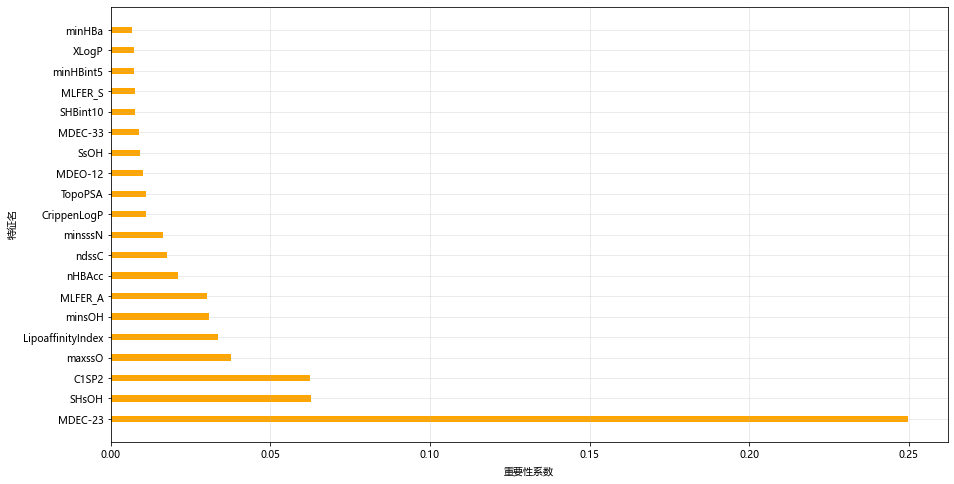

In [75]:
yy = score_
xx = range(len(yy))
plt.barh(range(len(xx)), yy, height=0.3, color='orange')
plt.yticks(range(len(name_refind_)),name_refind_)
plt.grid(alpha=0.3)  # 添加网格
plt.ylabel('特征名')
plt.xlabel('重要性系数')
plt.savefig('imporance.png')

In [243]:
MD__.to_csv("MD_mRMR__.csv",index = False)

In [89]:
LL = []
with open("SPSS50选20改进.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        LL.append(line)
LL[10] = 'WTPT-1'
LL_id = [feat_labels_dist[n] for n in LL]
LL

['nAtom',
 'nBondsS2',
 'ETA_Beta',
 'ETA_Eta',
 'nH',
 'bpol',
 'nBondsS',
 'nC',
 'nBonds2',
 'ETA_Eta_R',
 'WTPT-1',
 'sumI',
 'ATSm5',
 'ATSp2',
 'VABC',
 'ATSp3',
 'apol',
 'ATSm2',
 'AMR',
 'MW']

In [90]:
name_spss = []
for i in range(len(LL)):
    name_spss.append(LL[i])
name_spss[10] = 'WTPT-1'

MD_SPSS = MD.loc[:,name_spss]
X_SPSS = MD_SPSS.values
X_SPSS

array([[ 64.        ,  56.        ,  32.5       , ...,  40.49857609,
        126.1188    , 439.21811492],
       [ 70.        ,  62.        ,  33.5       , ...,  42.49857609,
        131.942     , 467.24941504],
       [ 62.        ,  48.        ,  40.25      , ...,  42.83066807,
        139.9304    , 463.18172941],
       ...,
       [ 67.        ,  44.        ,  57.25      , ...,  57.6636274 ,
        167.6057    , 570.13483879],
       [ 51.        ,  34.        ,  42.75      , ...,  45.99944345,
        125.5605    , 436.09805936],
       [ 73.        ,  50.        ,  58.75      , ...,  60.32781135,
        177.6817    , 598.16613892]])

In [91]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

R2 = []
MSE = []
MAE = []

# params = {
# 'n_estimators': 400, 
# 'max_depth': 11,
# 'learning_rate': 0.06,
#  'loss': 'ls',
#  'subsample':0.8
#  }

num = 20
x = preprocessing.scale(X_SPSS)
while num!=0:
    x=x[:, 0:num]
    #rfr=GradientBoostingRegressor(**params) #效果好
    # rfr=MLPRegressor()
    # rfr = KNeighborsRegressor(n_neighbors=5)
    rfr = SVR(kernel='rbf')
    rfr.fit(x, Y)
    rfr_y_predict = rfr.predict(x)

    R2.append(r2_score(Y, rfr_y_predict))
    MSE.append(mean_squared_error(Y, rfr_y_predict))
    MAE.append(mean_absolute_error(Y, rfr_y_predict))

    print (num, "\t",r2_score(Y, rfr_y_predict),"\t",mean_squared_error(Y, rfr_y_predict),"\t",mean_absolute_error(Y, rfr_y_predict))
    '''
    print "特征数量",num,":"
    print "支持向量回归的默认评估值为：", rfr.score(x, y)
    print "支持向量回归的R_squared值为：", r2_score(y, rfr_y_predict)
    print "支持向量回归的均方误差为:", mean_squared_error(y, rfr_y_predict)
    print "支持向量回归的平均绝对误差为:", mean_absolute_error(y, rfr_y_predict)
    print('**********************************')
    '''
    num-=1

20 	 0.539371526252336 	 0.9322979307025281 	 0.7483774512648896
19 	 0.5423176065103705 	 0.9263351544418625 	 0.7450132981230027
18 	 0.5293165239308539 	 0.9526489476104888 	 0.7566316321027533
17 	 0.5167174286573171 	 0.9781491307769271 	 0.7674672712702745
16 	 0.5177175515991342 	 0.9761249125571585 	 0.7662305229520212
15 	 0.5019595217275998 	 1.0080186826527262 	 0.7752645569487625
14 	 0.5043844395523812 	 1.003110723203815 	 0.7733233541221893
13 	 0.4949415357173833 	 1.0222228715118984 	 0.7816288707459023
12 	 0.4731122474588906 	 1.0664046827371647 	 0.7994627692045707
11 	 0.46804532137847177 	 1.0766599860217483 	 0.8024096307405858
10 	 0.46671777784158897 	 1.0793468935033543 	 0.8024726499616366
9 	 0.45630065828557 	 1.1004308246093535 	 0.8085802235183778
8 	 0.4620058915286631 	 1.08888360716655 	 0.8034531161395863
7 	 0.4320645082483715 	 1.149484050398982 	 0.830486125696878
6 	 0.43072445105648927 	 1.1521962851352552 	 0.833575574614127
5 	 0.35613105458643

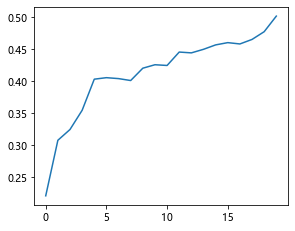

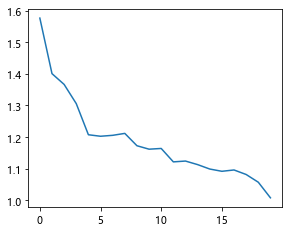

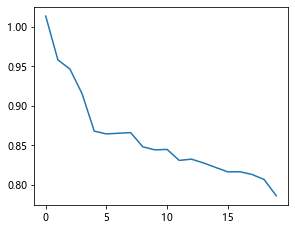

In [170]:
x = range(len(R2))

plt.subplot(2,2,1)
plt.plot(x, R2[::-1])
plt.show()
plt.subplot(2,2,2)
plt.plot(x, MSE[::-1])
plt.show()
plt.subplot(2,2,3)
plt.plot(x, MAE[::-1])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 1000)
RF.fit(X,Y)

In [178]:
##随机森林特征排序
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]
main_feature = []
main_feature_id = []
main_feature_scores = []
for f in range(350):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    main_feature.append(feat_labels[indices[f]])
    main_feature_id.append(feat_labels_dist[feat_labels[indices[f]]])
    main_feature_scores.append(importances[indices[f]])
main_feature_scores

 1) MDEC-23                        0.198749
 2) LipoaffinityIndex              0.043317
 3) minsssN                        0.038912
 4) C1SP2                          0.035818
 5) maxHsOH                        0.034194
 6) maxssO                         0.030885
 7) BCUTc-1l                       0.022343
 8) minHsOH                        0.022329
 9) minsOH                         0.018268
10) nHBAcc                         0.014967
11) MLFER_A                        0.014467
12) minHBint5                      0.013663
13) VC-5                           0.010706
14) nC                             0.010255
15) ATSc3                          0.010244
16) SHsOH                          0.009812
17) MDEO-12                        0.009116
18) MLogP                          0.008983
19) TopoPSA                        0.008648
20) SHBint10                       0.007085
21) MDEC-33                        0.006861
22) BCUTc-1h                       0.006760
23) ndssC                       

[0.1987486156999217,
 0.04331732301808386,
 0.038911987986101626,
 0.03581810741882015,
 0.03419358275119248,
 0.03088539765855389,
 0.022342589315160616,
 0.02232879462774342,
 0.018267510227984056,
 0.014967383558153755,
 0.014466878886486454,
 0.013663411126464398,
 0.010705754302417604,
 0.010254875426966435,
 0.010243637067147926,
 0.009811650650520988,
 0.009115771957034334,
 0.008983434481345698,
 0.008647950583646207,
 0.0070851284971598415,
 0.006861088740143255,
 0.006760140823124551,
 0.006652952725543449,
 0.006324865908925243,
 0.005781271033358135,
 0.00545142009069624,
 0.0053427494798827645,
 0.00525461667377662,
 0.0052008556407298085,
 0.005081392866018856,
 0.00502236428254628,
 0.00492401134333066,
 0.0048701945895475406,
 0.004742738259558912,
 0.0044964001222349064,
 0.004462796061798749,
 0.004366585868626946,
 0.004350672335499488,
 0.004048686484889229,
 0.003983167656181573,
 0.003972182070104154,
 0.003914943282655508,
 0.0037945897073787685,
 0.0037000309567

In [181]:
X_rf = MD.loc[:,main_feature].values
MD.loc[:,main_feature]

,MDEC-23,LipoaffinityIndex,minsssN,C1SP2,maxHsOH,maxssO,BCUTc-1l,minHsOH,minsOH,nHBAcc,...,maxaaNH,n5Ring,nT10Ring,C3SP3,MDEN-22,minssS,nF10Ring,nT5Ring,naAromAtom,maxaasN
0,28.277932,11.830949,2.516142,0,0.469126,6.593009,-0.360525,0.469126,9.968948,1,...,0.0,1,1,1,0.0,-1.331303,1,1,12,0.0
1,31.076748,13.149974,2.521244,0,0.449126,6.674642,-0.360530,0.449126,10.058948,1,...,0.0,0,1,1,0.0,-1.378628,1,0,12,0.0
2,30.901064,10.577177,2.484448,0,0.516534,6.502751,-0.361379,0.480713,9.752886,1,...,0.0,0,1,0,0.0,-1.608354,1,0,18,0.0
3,30.570001,13.212767,2.519774,0,0.456486,6.622142,-0.360530,0.456486,10.025028,1,...,0.0,0,1,1,0.0,-1.350874,1,0,12,0.0
4,30.570001,12.489691,2.504217,0,0.473631,6.552810,-0.360530,0.473631,9.993342,1,...,0.0,0,1,0,0.0,-1.449689,1,0,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,10.292932,0.000000,0,0.511809,6.299676,-0.363905,0.502282,9.808143,3,...,0.0,2,0,0,0.0,0.000000,0,2,24,0.0
1970,45.421854,7.884092,0.000000,0,0.536069,6.260832,-0.364009,0.507282,9.696786,3,...,0.0,2,0,0,0.0,0.000000,0,2,24,0.0
1971,44.466435,7.965074,0.000000,0,0.545019,6.247428,-0.364009,0.509751,9.645181,3,...,0.0,2,0,0,0.0,0.000000,0,2,24,0.0
1972,32.179316,6.236558,0.000000,0,0.535862,6.182281,-0.363866,0.529269,9.668706,3,...,0.0,2,0,0,0.0,0.000000,0,2,18,0.0


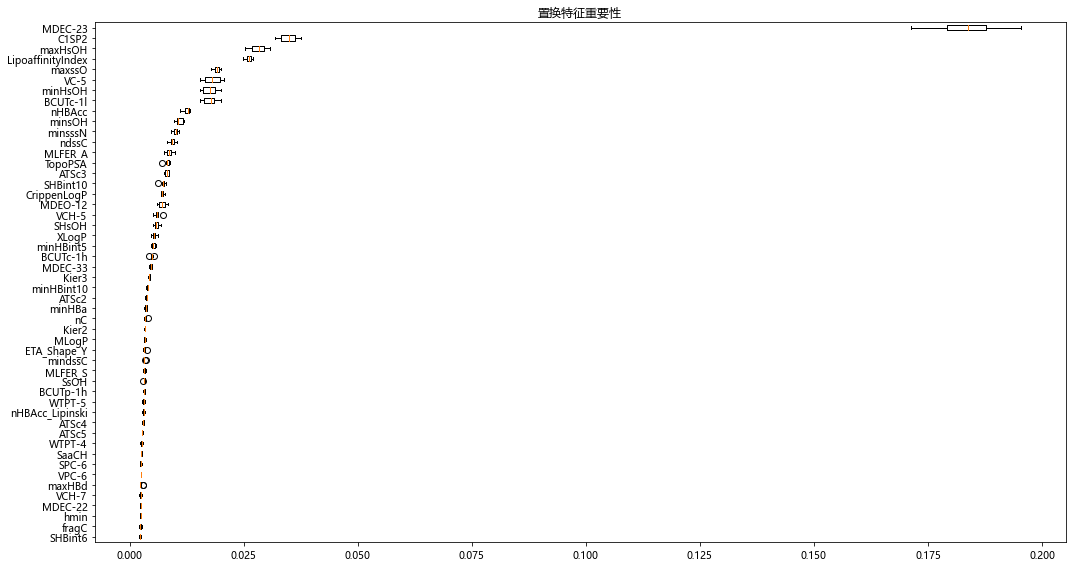

In [183]:
#置换特征重要性（Permutation importance）
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
# X_tmp = preprocessing.scale(X_)
X_tmp = preprocessing.scale(X_rf)

# rf = RandomForestRegressor(n_estimators = 3000)
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_tmp, Y)
result = permutation_importance(rf, X_tmp, Y, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

name_refind = [main_feature[i] for i in sorted_idx]

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx[-50:]].T,
           vert=False, labels = name_refind[-50:])
ax.set_title("置换特征重要性")
fig.tight_layout()
plt.show()

In [191]:
name_refind_ = name_refind[::-1]
name_refind_ = name_refind_[:20]
name_refind_


MD_rf = MD.loc[:,name_refind_]
X_rf = MD__.values
MD_rf

,MDEC-23,C1SP2,maxHsOH,LipoaffinityIndex,maxssO,VC-5,minHsOH,BCUTc-1l,nHBAcc,minsOH,minsssN,ndssC,MLFER_A,TopoPSA,ATSc3,SHBint10,CrippenLogP,MDEO-12,VCH-5,SHsOH
0,28.277932,0,0.469126,11.830949,6.593009,0.230311,0.469126,-0.360525,1,9.968948,2.516142,0,0.546,67.23,-0.126453,0.000000,5.50408,0.269680,0.144338,0.469126
1,31.076748,0,0.449126,13.149974,6.674642,0.230311,0.449126,-0.360530,1,10.058948,2.521244,0,0.546,67.23,-0.126453,0.000000,6.28428,0.269680,0.000000,0.449126
2,30.901064,0,0.516534,10.577177,6.502751,0.174055,0.480713,-0.361379,1,9.752886,2.484448,0,1.089,87.46,-0.143126,9.842059,6.11878,0.495846,0.000000,0.997247
3,30.570001,0,0.456486,13.212767,6.622142,0.123273,0.456486,-0.360530,1,10.025028,2.519774,0,0.546,67.23,-0.126504,0.000000,6.28428,0.269680,0.000000,0.456486
4,30.570001,0,0.473631,12.489691,6.552810,0.123273,0.473631,-0.360530,1,9.993342,2.504217,0,0.546,67.23,-0.128690,0.000000,5.55658,0.269680,0.000000,0.473631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,0.511809,10.292932,6.299676,0.208358,0.502282,-0.363905,3,9.808143,0.000000,2,1.089,119.90,0.060040,17.160557,6.07537,1.933548,0.089576,1.014091
1970,45.421854,0,0.536069,7.884092,6.260832,0.208358,0.507282,-0.364009,3,9.696786,0.000000,2,2.175,141.90,0.051389,17.177035,5.46937,1.906625,0.089576,2.095765
1971,44.466435,0,0.545019,7.965074,6.247428,0.208358,0.509751,-0.364009,3,9.645181,0.000000,2,2.175,141.90,0.051394,23.334095,5.46937,1.850440,0.089576,2.118206
1972,32.179316,0,0.535862,6.236558,6.182281,0.208358,0.529269,-0.363866,3,9.668706,0.000000,2,1.089,101.44,0.060397,17.182692,4.17938,1.666336,0.089576,1.065131


In [86]:
score_s_rf = [s/sum(main_feature_scores) for s in main_feature_scores]
dict_tmp = {}
for i in range(len(score_s_rf)):
    dict_tmp[main_feature[i]] = score_s_rf[i]
dict_tmp

{'MDEC-23': 0.19948554241898653,
 'LipoaffinityIndex': 0.043477936427228726,
 'minsssN': 0.03905626714768423,
 'C1SP2': 0.035950914987266894,
 'maxHsOH': 0.03432036685311525,
 'maxssO': 0.03099991556190319,
 'BCUTc-1l': 0.0224254319099704,
 'minHsOH': 0.022411586074152983,
 'minsOH': 0.01833524310919374,
 'nHBAcc': 0.015022880120077731,
 'MLFER_A': 0.01452051966056371,
 'minHBint5': 0.013714072776092498,
 'VC-5': 0.010745449453829912,
 'nC': 0.010292898794707636,
 'ATSc3': 0.010281618764925293,
 'SHsOH': 0.009848030614713623,
 'MDEO-12': 0.009149571719092467,
 'MLogP': 0.009016743558115659,
 'TopoPSA': 0.00868001574207661,
 'SHBint10': 0.007111398971946181,
 'MDEC-33': 0.0068865285128766685,
 'BCUTc-1h': 0.0067852062978180855,
 'ndssC': 0.006677620764648338,
 'XLogP': 0.006348317456833515,
 'CrippenLogP': 0.005802707022130352,
 'ETA_Shape_Y': 0.005471633047186696,
 'SHBint6': 0.0053625595038727675,
 'SsOH': 0.005274099916020662,
 'minHBa': 0.005220139546029756,
 'minssO': 0.00510023382

In [88]:
rf_ipt = []

for i in name_refind_:
    rf_ipt.append(dict_tmp[i])
rf_ipt

[0.19948554241898653,
 0.009848030614713623,
 0.035950914987266894,
 0.03099991556190319,
 0.043477936427228726,
 0.01833524310919374,
 0.01452051966056371,
 0.015022880120077731,
 0.006677620764648338,
 0.03905626714768423,
 0.005802707022130352,
 0.00868001574207661,
 0.009149571719092467,
 0.005274099916020662,
 0.0068865285128766685,
 0.007111398971946181,
 0.003997936577524838,
 0.013714072776092498,
 0.006348317456833515,
 0.005220139546029756]

In [119]:
def cor_selector(X, y,num_feats):

    cor_list = []

    feature_name = X.columns.tolist()

    # calculate the correlation with y for each feature

    for i in X.columns.tolist():

        cor = np.corrcoef(X[i], y)[0, 1]

        cor_list.append(cor)

    # replace NaN with 0

    cor_list = [0 if np.isnan(i) else i for i in cor_list]

    # feature name

    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-

num_feats:]].columns.tolist()

    # feature selection? 0 for not select, 1 for select

    cor_support = [True if i in cor_feature else False for i in

feature_name]

    return cor_list, cor_feature

In [169]:
cor_list, cor_feature = cor_selector(MD.iloc[:, 1:], Y, 350)
print(str(len(cor_feature)), 'selected features')

350 selected features


In [176]:
X_rf = MD.loc[:,main_feature].values
X_rf

array([[ 28.27793195,  11.8309492 ,   2.51614157, ...,   3.77      ,
         67.23      ,   0.        ],
       [ 31.07674804,  13.14997391,   2.52124361, ...,   3.99      ,
         67.23      ,   0.        ],
       [ 30.90106359,  10.5771773 ,   2.48444804, ...,   3.77      ,
         87.46      ,   9.84205891],
       ...,
       [ 44.46643496,   7.96507406,   0.        , ...,   3.99      ,
        141.9       ,  23.3340951 ],
       [ 32.17931565,   6.23655822,   0.        , ...,   3.33      ,
        101.44      ,  17.18269223],
       [ 44.46643496,  10.37118385,   0.        , ...,   4.21      ,
        119.9       ,  17.09696021]])

In [162]:
dict_tmp2 = {}
for i in range(len(cor_feature)):
    dict_tmp2[cor_feature[i]] = cor_list[i]
dict_tmp2

{'minHssNH2p': 0.06492516067133561,
 'SsLi': 0.18800881860627833,
 'SHmisc': 0.03304806626943128,
 'minssssPb': 0.4251490335740295,
 'SHsssNHp': 0.3832531079446701,
 'SHssNH2p': 0.32546862008839483,
 'SHsNH3p': 0.2859809670006365,
 'maxHsNH3p': 0.361988602483777,
 'maxHssNH2p': 0.350709763260625,
 'nssssPb': 0.34490203993099483,
 'nsssPbH': 0,
 'nssPbH2': 0.4595489555376125,
 'nsPbH3': -0.18622097679011165,
 'nssssSn': 0.07198352325293873,
 'nsssSnH': 0.006508456085423171,
 'nssSnH2': -0.035941021523002506,
 'SssBe': 0.08706209309296409,
 'SssssBem': -0.061131075410885465,
 'SsBH2': -0.09251546074442116,
 'SssBH': -0.044223204229198024,
 'mindssSe': 0.0206591345384029,
 'minssssssSe': -0.02812663681646644,
 'minddssSe': 0.06085876146961608,
 'SsssNHp': -0.35185935156595044,
 'minsSnH3': 0.31852794580996535,
 'SssNH2p': -0.07551546990147497,
 'SsNH3p': 0.08786621189360207,
 'nsSnH3': 0.2988073450609501,
 'minssSnH2': 0.2864609553003706,
 'minssssSn': 0.2981131703126566,
 'SddC': 0.25060

In [167]:
p_ipt = []

for i in name_refind_:
    if dict_tmp2[i] >= 0:
        p_ipt.append(dict_tmp2[i])
    else:
        p_ipt.append(-dict_tmp2[i])
p_ipt

[0.37074848483260164,
 0.16711230075387254,
 0.027874900003542726,
 0,
 0.3622304438350052,
 0.1840306227635459,
 0.3580267915863241,
 0.2698823666790566,
 0.22456465629704736,
 0.3652589957277705,
 0.0026264797346837,
 0.022952438019797725,
 0.0746228786943647,
 0.03523123855502275,
 0.07131124370819948,
 0,
 0.02807404434300978,
 0.034906576305756845,
 0.20615249565730032,
 0]

In [165]:
name_refind_

['MDEC-23',
 'SHsOH',
 'C1SP2',
 'maxssO',
 'LipoaffinityIndex',
 'minsOH',
 'MLFER_A',
 'nHBAcc',
 'ndssC',
 'minsssN',
 'CrippenLogP',
 'TopoPSA',
 'MDEO-12',
 'SsOH',
 'MDEC-33',
 'SHBint10',
 'MLFER_S',
 'minHBint5',
 'XLogP',
 'minHBa']

In [192]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

R2 = []
MSE = []
MAE = []


num = 20
x = preprocessing.scale(X_rf)
while num!=0:
    x=x[:, 0:num]
    #rfr=GradientBoostingRegressor(**params) #效果好
    # rfr=MLPRegressor()
    # rfr = KNeighborsRegressor(n_neighbors=5)
    rfr = SVR(kernel='rbf')
    rfr.fit(x, Y)
    rfr_y_predict = rfr.predict(x)

    R2.append(r2_score(Y, rfr_y_predict))
    MSE.append(mean_squared_error(Y, rfr_y_predict))
    MAE.append(mean_absolute_error(Y, rfr_y_predict))

    print (num, "\t",r2_score(Y, rfr_y_predict),"\t",mean_squared_error(Y, rfr_y_predict),"\t",mean_absolute_error(Y, rfr_y_predict))
    '''
    print "特征数量",num,":"
    print "支持向量回归的默认评估值为：", rfr.score(x, y)
    print "支持向量回归的R_squared值为：", r2_score(y, rfr_y_predict)
    print "支持向量回归的均方误差为:", mean_squared_error(y, rfr_y_predict)
    print "支持向量回归的平均绝对误差为:", mean_absolute_error(y, rfr_y_predict)
    print('**********************************')
    '''
    num-=1

20 	 0.5886817879350204 	 0.8324954704786938 	 0.6930848306973545
19 	 0.5916554422594177 	 0.8264768851517715 	 0.6901155285371283
18 	 0.5664424820291112 	 0.877507144871401 	 0.7198971709193035
17 	 0.5698000592132169 	 0.8707115114285789 	 0.7171506996715717
16 	 0.5659092992071555 	 0.8785862905819367 	 0.7189987506625909
15 	 0.5619939105793702 	 0.8865109173117645 	 0.7205452057279844
14 	 0.5194147425632397 	 0.9726898499980225 	 0.7613612268113459
13 	 0.5204468854920602 	 0.9706008243047135 	 0.7607122340750908
12 	 0.47827832695327055 	 1.0559486959778797 	 0.811132712627277
11 	 0.4604948510234371 	 1.0919419068951108 	 0.8284113807485614
10 	 0.45818593093637483 	 1.0966150904736511 	 0.8303629300628773
9 	 0.4497035755051093 	 1.1137831182156448 	 0.8382387153168873
8 	 0.44681938985146485 	 1.1196206216916624 	 0.8399711790534917
7 	 0.4390563935976546 	 1.1353326884785793 	 0.8472134880385819
6 	 0.41552611198932554 	 1.1829572581753067 	 0.8612076658847461
5 	 0.408116

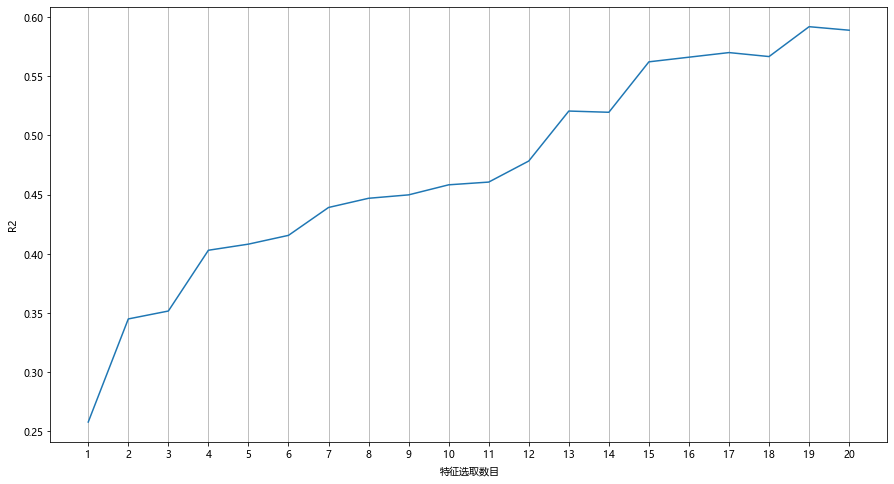

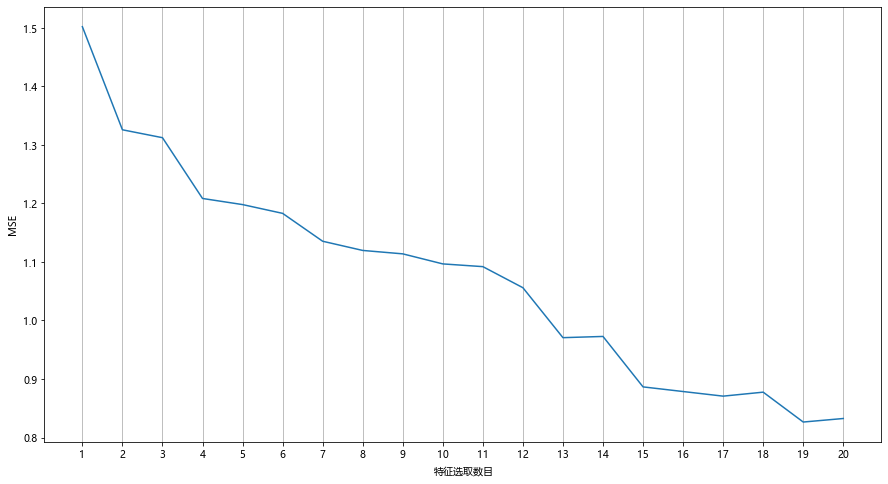

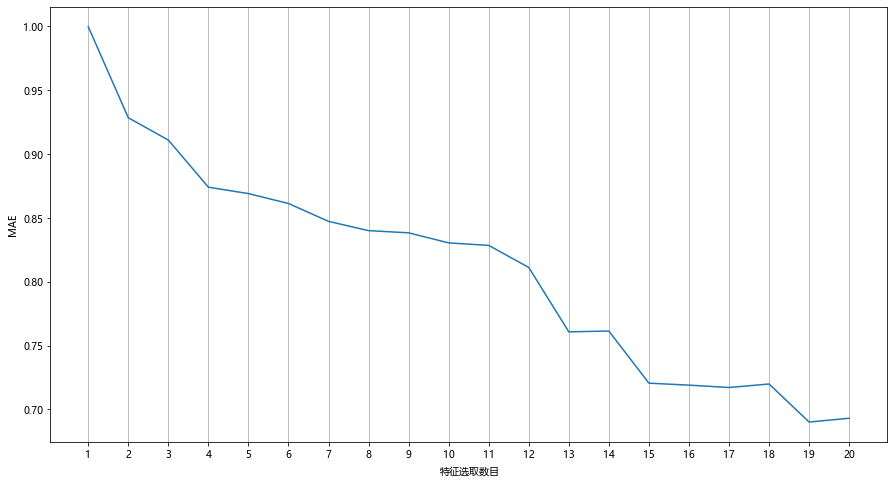

In [193]:
x = range(1,len(R2)+1)

matplotlib.rcParams['figure.figsize'] = (15,8)#图片像素 
matplotlib.rcParams['savefig.dpi'] = 300# 分辨率

plt.plot(x, R2[::-1])
plt.xlabel("特征选取数目")
plt.grid(axis='x')
plt.ylabel("R2")
plt.xticks(range(1,21))
plt.savefig("R2.png")
plt.show()

plt.plot(x, MSE[::-1])
plt.xlabel("特征选取数目")
plt.grid(axis='x')
plt.ylabel("MSE")
plt.xticks(range(1,21))
plt.savefig("MSE.png")
plt.show()

plt.plot(x, MAE[::-1])
plt.xlabel("特征选取数目")
plt.grid(axis='x')
plt.ylabel("MAE")
plt.xticks(range(1,21))
plt.savefig("MAE.png")
plt.show()